In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [177]:
df_historico = pd.read_csv('../Raw_Datasets/EDA_historicos_deportes.csv',sep=',')
df_historico 

,Temperatura (°C),Humedad,Edad,Peso (Kg),Distancia (Km),Clima_Lluvioso,Clima_Nublado,Clima_Soleado,Genero_Hombre,Genero_Mujer,...,Sóftbol,Tai chi,Tenis,Tenis de mesa,Tenis en pareja,Ultimate frisbee,Voleibol,Voleibol acuático,Waterpolo,Yoga
0,12,59,58,50.80,16.16,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,26,43,56,89.11,19.74,0,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
2,22,35,30,56.22,12.16,1,0,0,1,0,...,1,1,1,0,0,1,1,1,1,1
3,39,32,28,89.88,2.10,1,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
4,13,45,63,80.80,13.11,0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,46,53,78.31,2.93,0,1,0,1,0,...,1,1,1,0,1,1,1,1,1,1
996,13,53,49,50.31,10.75,0,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
997,35,50,49,53.09,2.64,1,0,0,0,1,...,0,1,0,1,1,1,0,1,1,0
998,21,80,21,76.77,4.46,1,0,0,1,0,...,1,1,1,1,1,1,0,1,1,1


In [178]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperatura (°C)           1000 non-null   int64  
 1   Humedad                    1000 non-null   int64  
 2   Edad                       1000 non-null   int64  
 3   Peso (Kg)                  1000 non-null   float64
 4   Distancia (Km)             1000 non-null   float64
 5   Clima_Lluvioso             1000 non-null   int64  
 6   Clima_Nublado              1000 non-null   int64  
 7   Clima_Soleado              1000 non-null   int64  
 8   Genero_Hombre              1000 non-null   int64  
 9   Genero_Mujer               1000 non-null   int64  
 10  Condicion_0                1000 non-null   int64  
 11  Condicion_1                1000 non-null   int64  
 12  Condicion_2                1000 non-null   int64  
 13  Objetivo_0                 1000 non-null   int64 

In [179]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Tu código para el submuestreo aleatorio aquí


In [180]:
df_historico['Temperatura (°C)'] = df_historico['Temperatura (°C)'].astype('category')


In [181]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Supongamos que tienes un DataFrame llamado df_historico y una columna 'Temperatura (°C)' que contiene las etiquetas de clase.

# Convertir la columna 'Temperatura (°C)' a tipo categórico
df_historico['Temperatura (°C)'] = df_historico['Temperatura (°C)'].astype('category')

# Obtener el número mínimo de muestras en una clase en la columna objetivo
min_samples_per_class = df_historico['Temperatura (°C)'].value_counts().min()

# Crear el diccionario de sampling_strategy con el número mínimo de muestras para cada clase
sampling_strategy = {class_label: min_samples_per_class for class_label in df_historico['Temperatura (°C)'].unique()}

# Aplicar el submuestreo aleatorio con el diccionario de sampling_strategy
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_under, y_under = under_sampler.fit_resample(df_historico.drop('Temperatura (°C)', axis=1), df_historico['Temperatura (°C)'])

# Crear el DataFrame desbalanceado con submuestreo
df_combined = pd.concat([pd.DataFrame(X_under), pd.Series(y_under, name='Temperatura (°C)')], axis=1)


In [182]:
df_historico.columns


Index(['Temperatura (°C)', 'Humedad', 'Edad', 'Peso (Kg)', 'Distancia (Km)',
       'Clima_Lluvioso', 'Clima_Nublado', 'Clima_Soleado', 'Genero_Hombre',
       'Genero_Mujer', 'Condicion_0', 'Condicion_1', 'Condicion_2',
       'Objetivo_0', 'Objetivo_1', 'Objetivo_2', 'Aeróbicos',
       'Aeróbicos acuáticos', 'Artes marciales', 'Atletismo', 'BMX',
       'Baloncesto', 'Balonmano', 'Billar', 'Bolos', 'Boxeo', 'Bádminton',
       'Béisbol', 'Calistenia', 'Calva', 'Caminar', 'Chito', 'Ciclismo',
       'Ciclismo estacionario', 'Correr', 'Dardos',
       'Entrenamiento en circuito', 'Escalada', 'Frisbee', 'Frontenis',
       'Fútbol', 'Fútbol sala', 'Gimnasia', 'Golf', 'Hockey', 'Kickball',
       'Kickboxing', 'Levantamiento de peso', 'Marcha rápida', 'Minigolf',
       'Montañismo', 'Máquina escaladora', 'Nado sincronizado', 'Natación',
       'Padel', 'Patinaje', 'Patinaje sobre hielo', 'Petanca', 'Raquetbol',
       'Salto a la comba', 'Senderismo', 'Skateboard', 'Sóftbol', 'Tai chi'

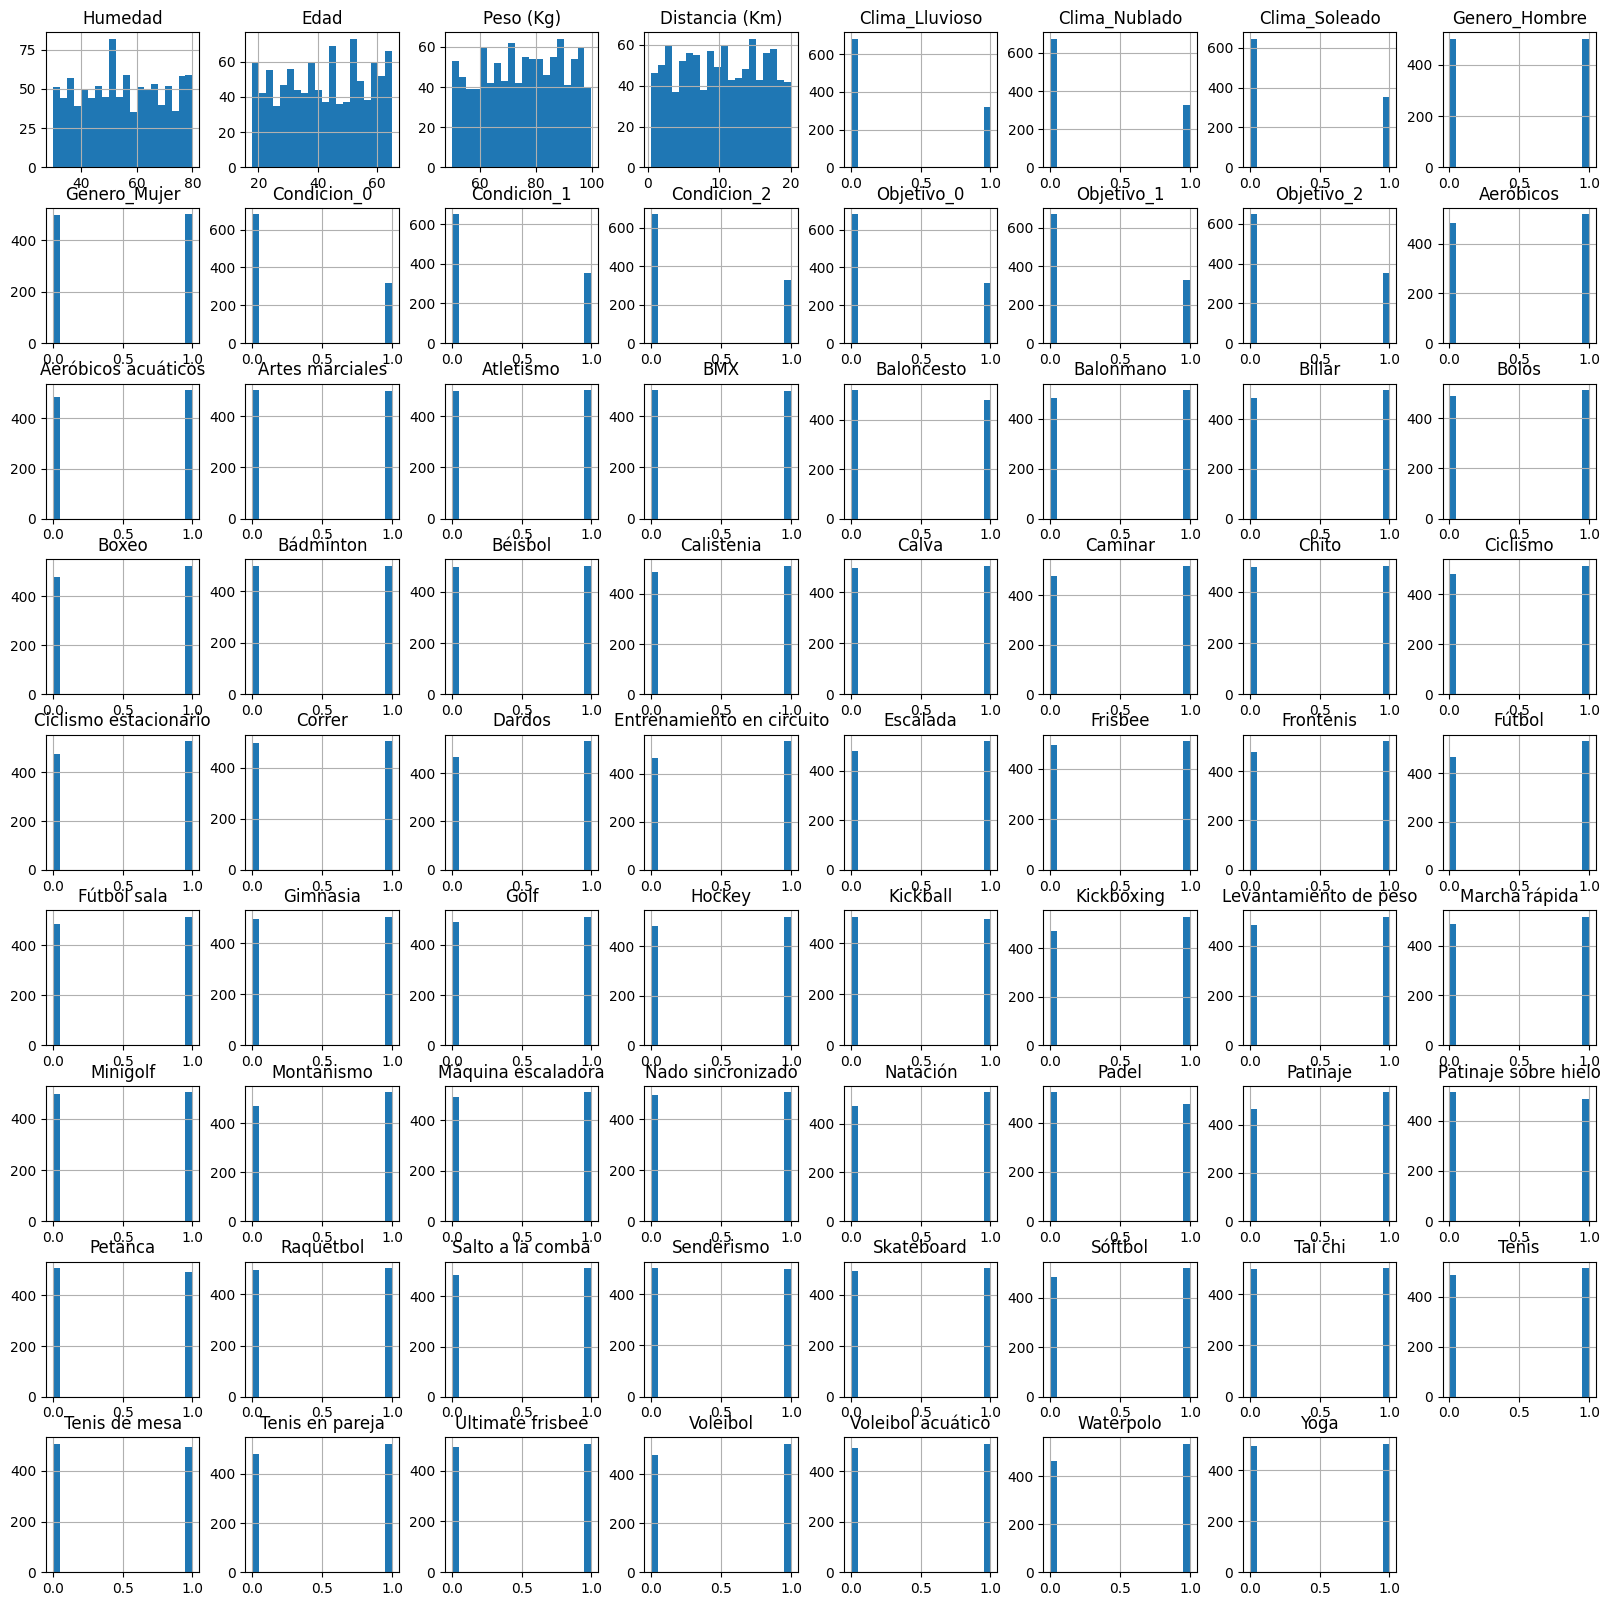

In [183]:
import matplotlib.pyplot as plt

# Histogramas
df_historico.hist(bins=20, figsize=(20, 20))
plt.show()




C:\Users\de969\AppData\Local\Temp\ipykernel_8572\392216420.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



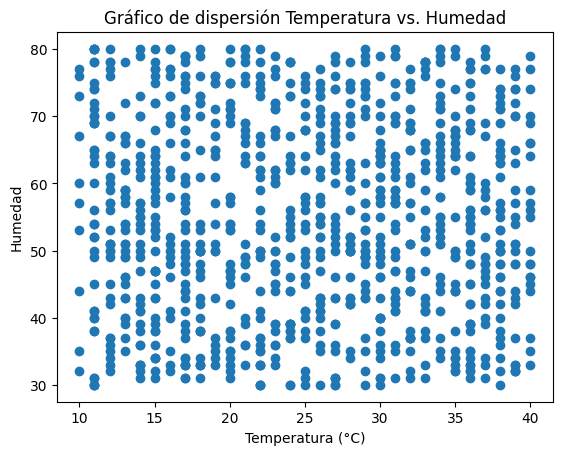

In [184]:
# Matriz de correlación
correlation_matrix = df_historico.corr()


# Gráfico de dispersión para dos variables específicas
plt.scatter(df_historico['Temperatura (°C)'], df_historico['Humedad'])
plt.xlabel('Temperatura (°C)')
plt.ylabel('Humedad')
plt.title('Gráfico de dispersión Temperatura vs. Humedad')
plt.show();


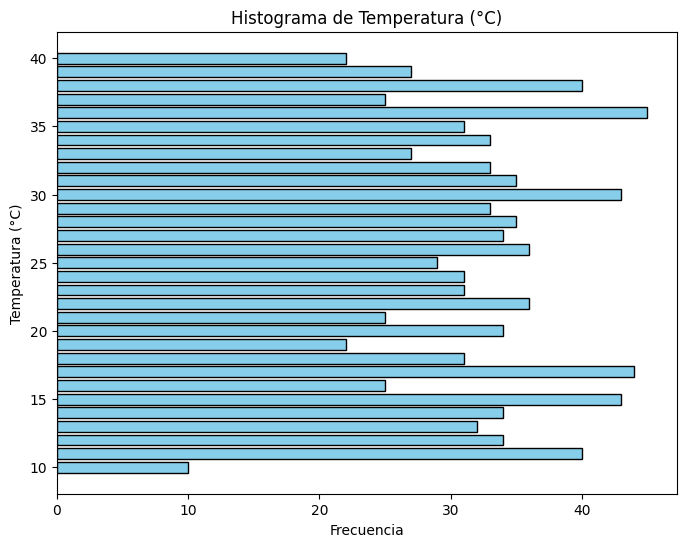

In [187]:
import matplotlib.pyplot as plt

# Contar las frecuencias de las temperaturas
frecuencia_temperaturas = df_historico['Temperatura (°C)'].value_counts()

plt.figure(figsize=(8, 6))
plt.barh(frecuencia_temperaturas.index, frecuencia_temperaturas.values, color='skyblue', edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Temperatura (°C)')
plt.title('Histograma de Temperatura (°C)')
plt.show()


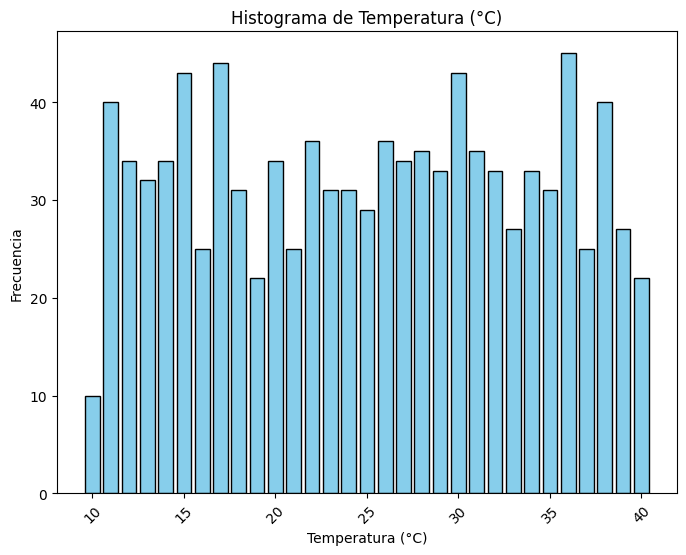

In [188]:
import matplotlib.pyplot as plt

# Contar las frecuencias de las temperaturas
frecuencia_temperaturas = df_historico['Temperatura (°C)'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(frecuencia_temperaturas.index, frecuencia_temperaturas.values, color='skyblue', edgecolor='black')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Temperatura (°C)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.show()


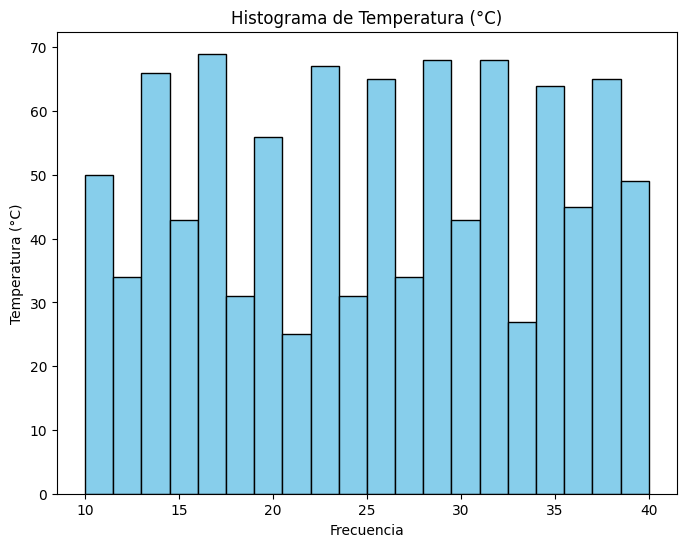

In [185]:
# Histograma de Temperatura (°C)
plt.figure(figsize=(8, 6))
plt.hist(df_historico['Temperatura (°C)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Temperatura (°C)')
plt.show()

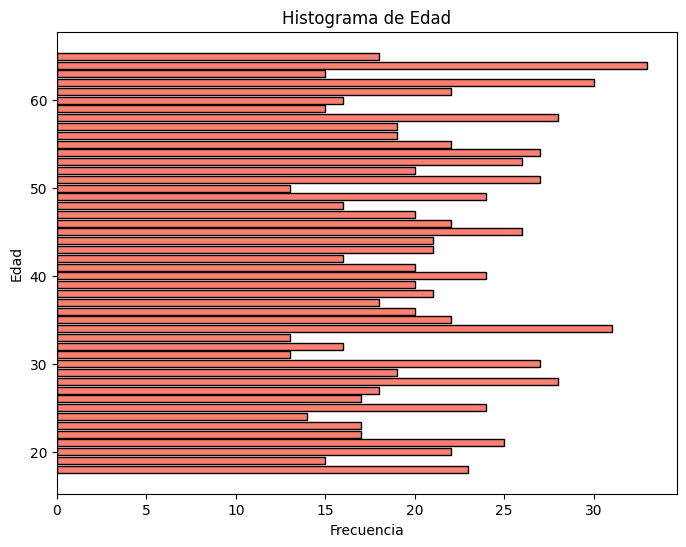

In [190]:
import matplotlib.pyplot as plt

# Obtener la frecuencia de cada edad
frecuencia_edades = df_historico['Edad'].value_counts()

plt.figure(figsize=(8, 6))
plt.barh(frecuencia_edades.index, frecuencia_edades, color='salmon', edgecolor='black')
plt.xlabel('Frecuencia')
plt.ylabel('Edad')
plt.title('Histograma de Edad')
plt.show()


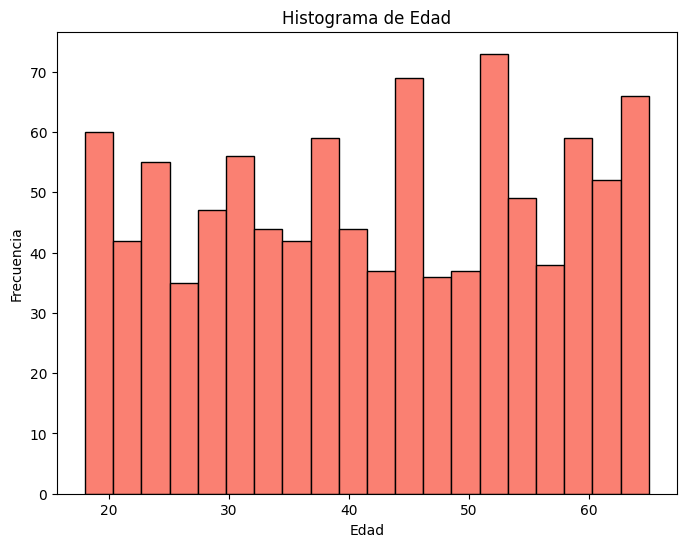

In [191]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_historico['Edad'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()


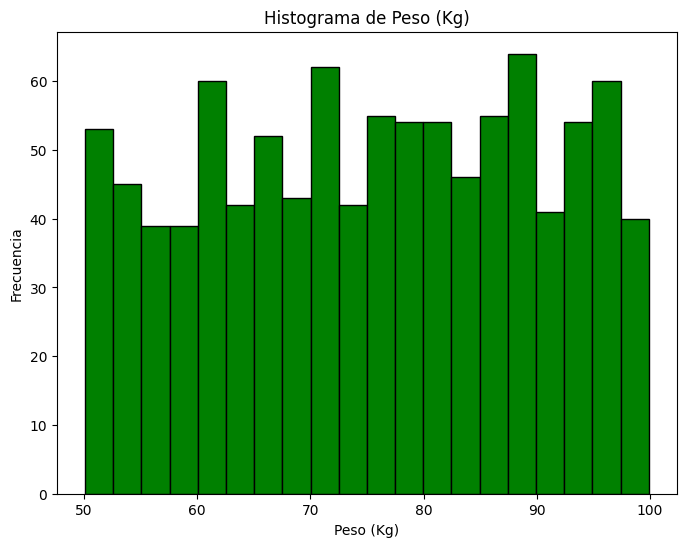

In [193]:
# Histograma de Peso (Kg)
plt.figure(figsize=(8, 6))
plt.hist(df_historico['Peso (Kg)'], bins=20, color='green', edgecolor='black')
plt.xlabel('Peso (Kg)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Peso (Kg)')
plt.show()

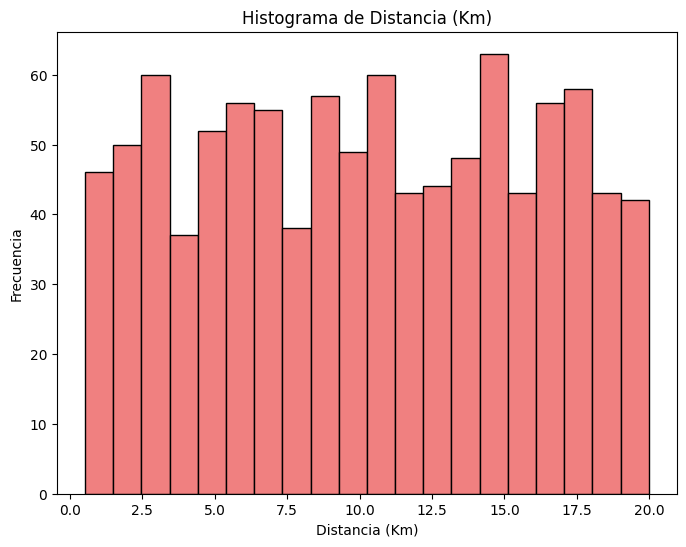

In [163]:
# Histograma de Distancia (Km)
plt.figure(figsize=(8, 6))
plt.hist(df_historico['Distancia (Km)'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Distancia (Km)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Distancia (Km)')
plt.show()

In [164]:
#  # Gráfico de dispersión para algunas variables numéricas
# print("Relaciones entre variables numéricas:")
# sns.pairplot(df_historico[['Temperatura (°C)', 'Humedad', 'Edad', 'Peso (Kg)', 'Distancia (Km)']])
# plt.suptitle("Relaciones entre variables numéricas", y=1.02)
# plt.show()

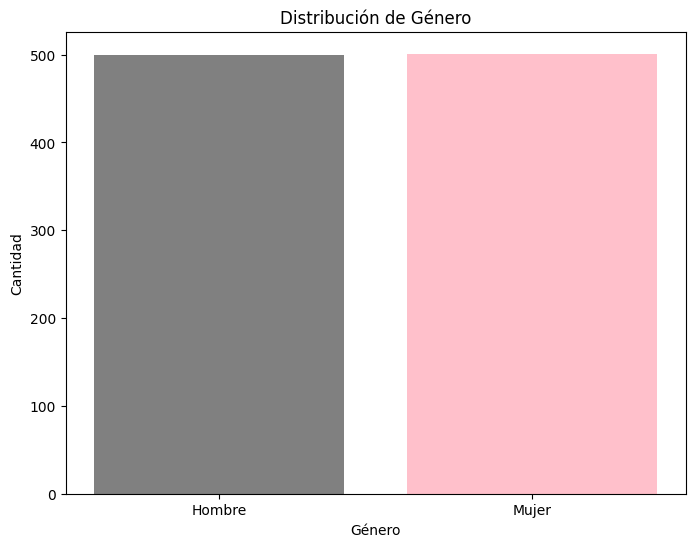

In [174]:


# Contar la cantidad de hombres y mujeres en el dataset
genero_counts = df_historico[['Genero_Hombre', 'Genero_Mujer']].sum()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Hombre', 'Mujer'], genero_counts, color=['Grey', 'pink'])
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribución de Género')
plt.show()


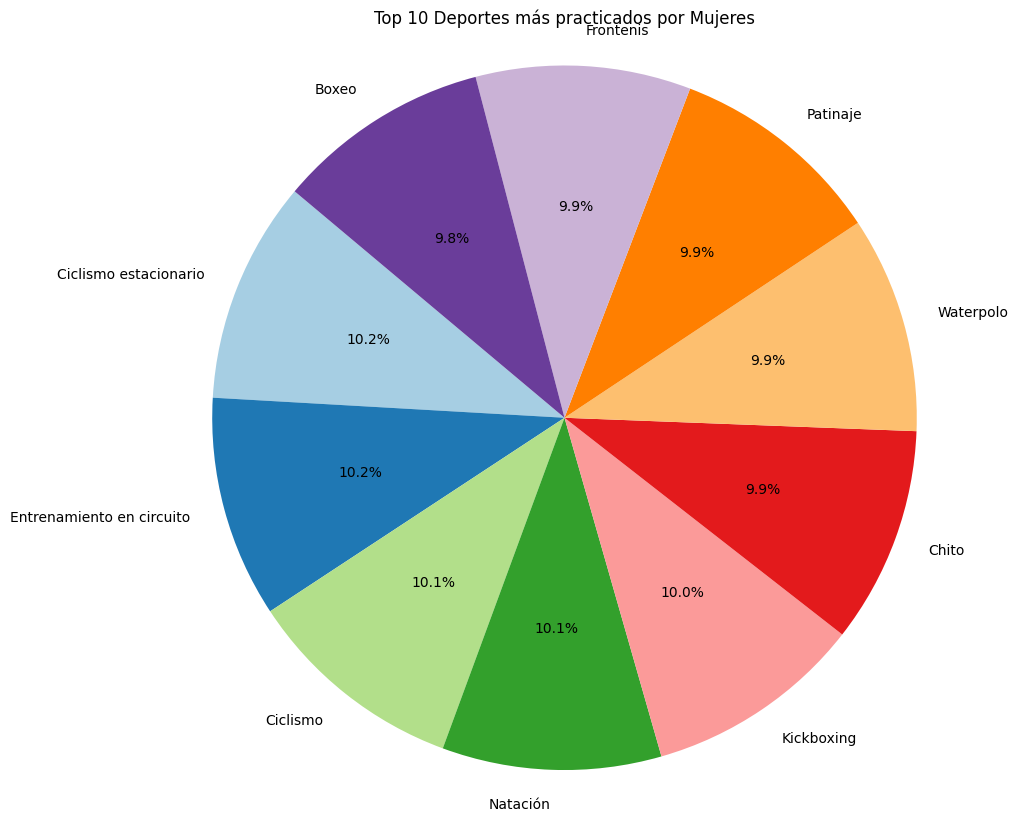

In [175]:

# Filtrar el dataset para obtener solo las filas donde el género es mujer
df_mujeres = df_historico[df_historico['Genero_Mujer'] == 1]

# Contar la cantidad de veces que aparece cada deporte para las mujeres
deportes_counts_mujeres = df_mujeres[df_historico.columns[16:]].sum()

# Ordenar los deportes de forma descendente y seleccionar los 10 más practicados
deportes_counts_mujeres_top10 = deportes_counts_mujeres.sort_values(ascending=False).head(10)

# Crear el gráfico de pastel para visualizar los 10 deportes más practicados por mujeres
plt.figure(figsize=(10, 10))
plt.pie(deportes_counts_mujeres_top10, labels=deportes_counts_mujeres_top10.index, colors=plt.cm.Paired.colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Deportes más practicados por Mujeres')
plt.show()


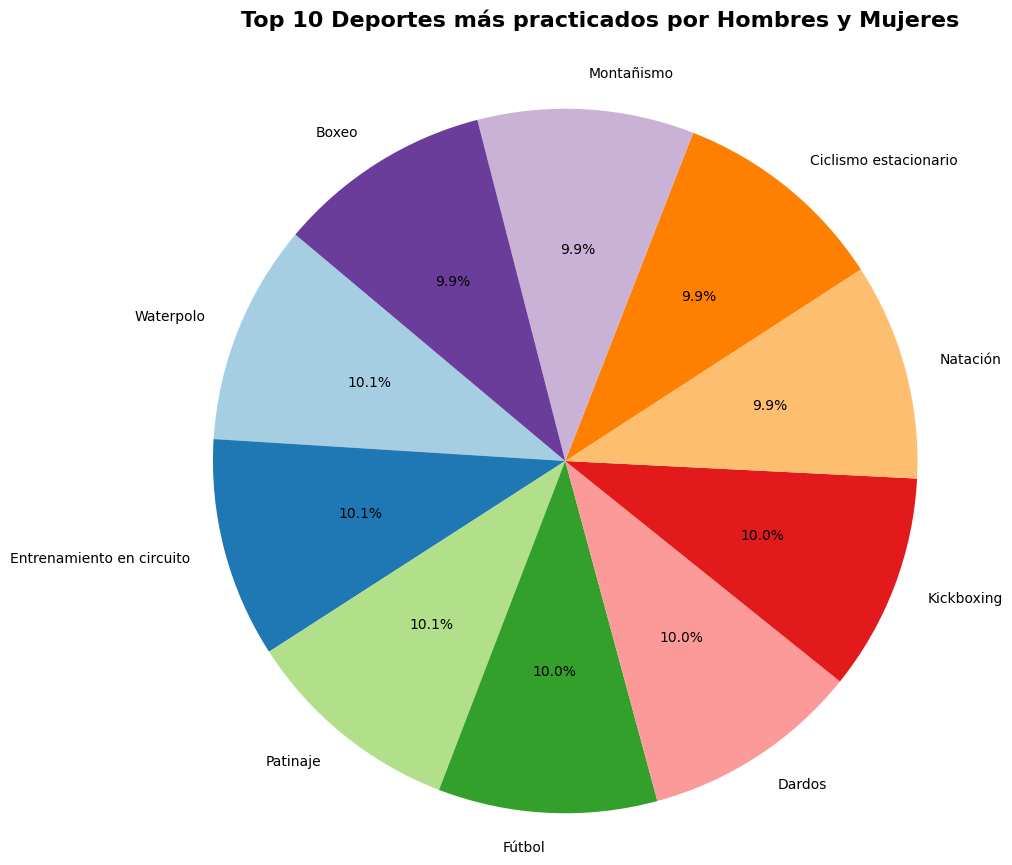

In [201]:
# Contar la cantidad de veces que aparece cada deporte en todo el dataset
deportes_counts = df_historico[df_historico.columns[16:]].sum()

# Ordenar los deportes de forma descendente y seleccionar los 10 más practicados
deportes_counts_top10 = deportes_counts.sort_values(ascending=False).head(10)

# Crear el gráfico de pastel para visualizar los 10 deportes más practicados tanto por hombres como por mujeres
plt.figure(figsize=(10, 10))
plt.pie(deportes_counts_top10, labels=deportes_counts_top10.index, colors=plt.cm.Paired.colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Agregar un título y un subtítulo (encabezado)
plt.text(0.10, 1.25, 'Top 10 Deportes más practicados por Hombres y Mujeres', ha='center', va='center', fontsize=16, fontweight='bold')
# plt.text(0.5, 1.02, 'Conteo de la cantidad de veces que aparece cada deporte en todo el dataset', ha='center', va='center', fontsize=12)

plt.show()


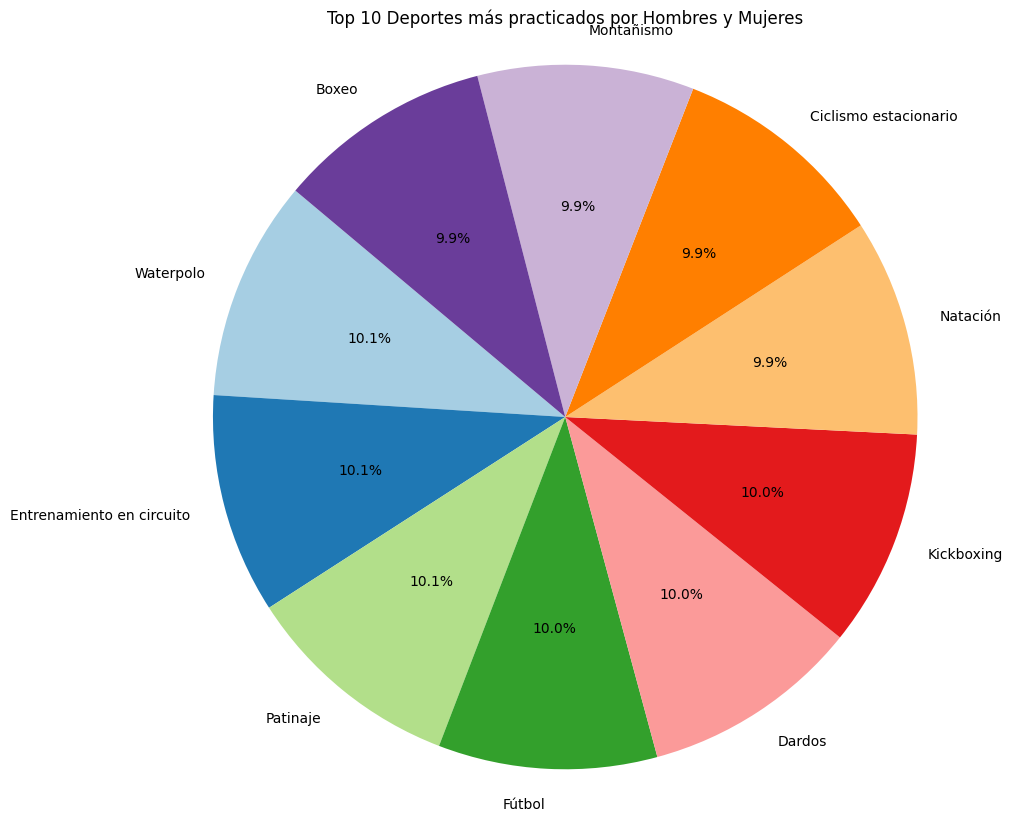

In [194]:
# Contar la cantidad de veces que aparece cada deporte en todo el dataset
deportes_counts = df_historico[df_historico.columns[16:]].sum()

# Ordenar los deportes de forma descendente y seleccionar los 10 más practicados
deportes_counts_top10 = deportes_counts.sort_values(ascending=False).head(10)

# Crear el gráfico de pastel para visualizar los 10 deportes más practicados tanto por hombres como por mujeres
plt.figure(figsize=(10, 10))
plt.pie(deportes_counts_top10, labels=deportes_counts_top10.index, colors=plt.cm.Paired.colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Deportes más practicados por Hombres y Mujeres')
plt.show()


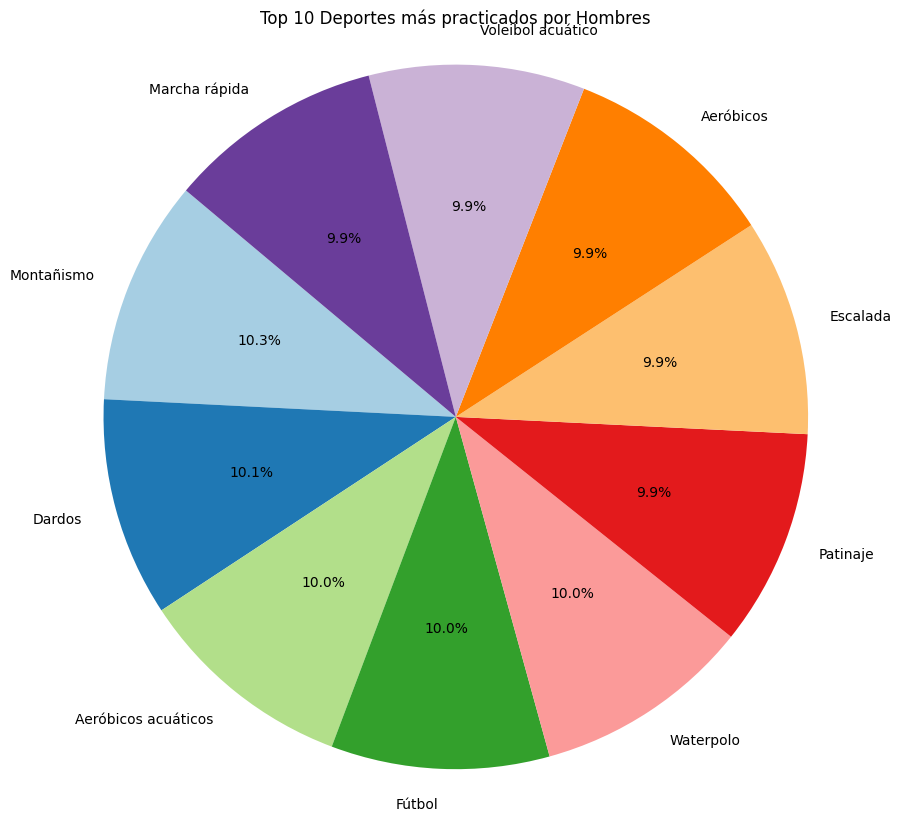

In [167]:
# Filtrar el dataset para obtener solo las filas donde el género es hombre
df_hombres = df_historico[df_historico['Genero_Hombre'] == 1]

# Contar la cantidad de veces que aparece cada deporte para los hombres
deportes_counts_hombres = df_hombres[df_historico.columns[16:]].sum()

# Ordenar los deportes de forma descendente y seleccionar los 10 más practicados
deportes_counts_hombres_top10 = deportes_counts_hombres.sort_values(ascending=False).head(10)

# Crear el gráfico de pastel para visualizar los 10 deportes más practicados por hombres
plt.figure(figsize=(10, 10))
plt.pie(deportes_counts_hombres_top10, labels=deportes_counts_hombres_top10.index, colors=plt.cm.Paired.colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Deportes más practicados por Hombres')
plt.show()


In [168]:
# # Filtrar el dataset para obtener solo las filas donde el clima es lluvioso
# df_lluvioso = df_historico[df_historico['Clima_Lluvioso'] == 1]

# # Contar la cantidad de veces que aparece cada deporte cuando el clima es lluvioso
# deportes_counts_lluvioso = df_lluvioso[df_historico.columns[16:]].sum()

# # Ordenar los deportes de forma descendente según su frecuencia
# deportes_counts_lluvioso_sorted = deportes_counts_lluvioso.sort_values(ascending=False)

# # Crear el gráfico de barras para visualizar los deportes más practicados cuando el clima es lluvioso
# plt.figure(figsize=(12, 6))
# plt.bar(deportes_counts_lluvioso_sorted.index, deportes_counts_lluvioso_sorted.values, color='blue')
# plt.xlabel('Deporte')
# plt.ylabel('Cantidad')
# plt.title('Deportes más practicados en Clima Lluvioso')
# plt.xticks(rotation=90)
# plt.show()


In [169]:
import matplotlib.pyplot as plt

# Agrupar por las columnas de clima y calcular la suma de cada deporte en cada grupo
df_clima_counts = df_historico.groupby(['Clima_Lluvioso', 'Clima_Nublado', 'Clima_Soleado'])[df_historico.columns[16:]].sum()

# Encontrar el deporte más practicado en cada tipo de clima
deporte_mas_practicado_lluvioso = df_clima_counts.loc[(1, 0, 0)].idxmax()
deporte_mas_practicado_nublado = df_clima_counts.loc[(0, 1, 0)].idxmax()
deporte_mas_practicado_soleado = df_clima_counts.loc[(0, 0, 1)].idxmax()

print("Deporte más practicado en clima lluvioso:", deporte_mas_practicado_lluvioso)
print("Deporte más practicado en clima nublado:", deporte_mas_practicado_nublado)
print("Deporte más practicado en clima soleado:", deporte_mas_practicado_soleado)


Deporte más practicado en clima lluvioso: Dardos
Deporte más practicado en clima nublado: Fútbol
Deporte más practicado en clima soleado: Kickboxing


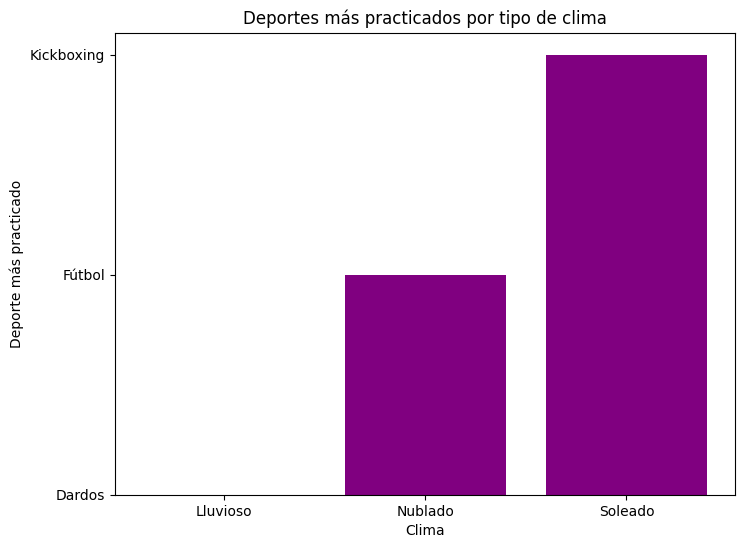

In [170]:
# Crear un DataFrame para visualizar los resultados
df_deporte_mas_practicado = pd.DataFrame({
    'Clima': ['Lluvioso', 'Nublado', 'Soleado'],
    'Deporte': [deporte_mas_practicado_lluvioso, deporte_mas_practicado_nublado, deporte_mas_practicado_soleado]
})

# Crear el gráfico de barras para visualizar los deportes más practicados en cada clima
plt.figure(figsize=(8, 6))
plt.bar(df_deporte_mas_practicado['Clima'], df_deporte_mas_practicado['Deporte'], color='purple')
plt.xlabel('Clima')
plt.ylabel('Deporte más practicado')
plt.title('Deportes más practicados por tipo de clima')
plt.show()


In [171]:
# Filtrar los datos para obtener las columnas de interés
df_genero_edad = df_historico[['Genero_Hombre', 'Genero_Mujer', 'Edad']]

# Dividir los datos por género
df_hombres = df_genero_edad[df_genero_edad['Genero_Hombre'] == 1]
df_mujeres = df_genero_edad[df_genero_edad['Genero_Mujer'] == 1]

# Crear el gráfico de caja para hombres y mujeres
fig = go.Figure()

fig.add_trace(go.Box(y=df_hombres['Edad'], name='Hombres'))
fig.add_trace(go.Box(y=df_mujeres['Edad'], name='Mujeres'))

fig.update_layout(
    title='Distribución de Edades según Género',
    xaxis_title='Género',
    yaxis_title='Edad'
)

fig.show()


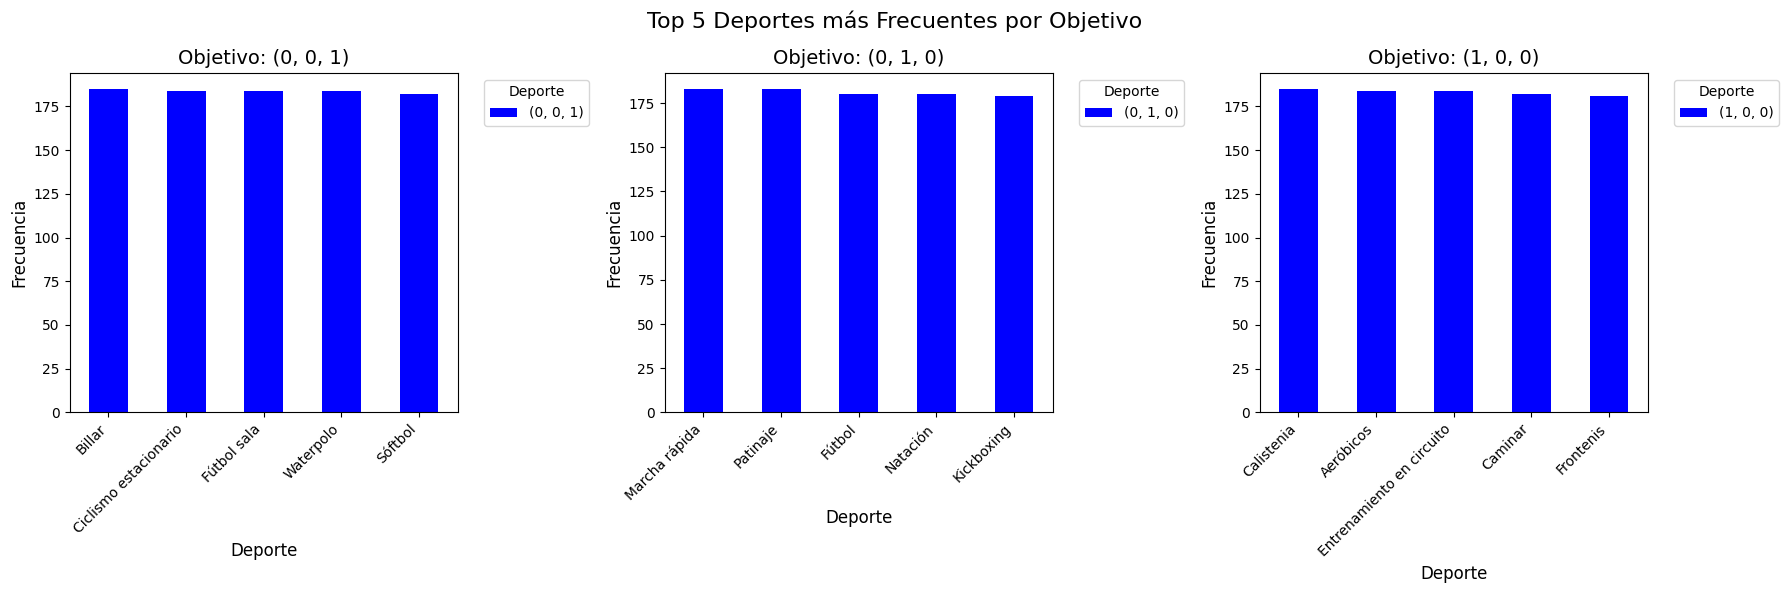

In [172]:
# Filtrar los datos para obtener las columnas de interés (objetivos y deportes)
columnas_interes = df_historico.columns[13:16].tolist() + df_historico.columns[16:].tolist()
df_objetivo_deporte = df_historico[columnas_interes]

# Usar la función groupby() para agrupar los datos por el objetivo y el deporte
grupo_objetivo_deporte = df_objetivo_deporte.groupby(['Objetivo_0', 'Objetivo_1', 'Objetivo_2'])

# Calcular la frecuencia de cada deporte para cada objetivo
frecuencia_deporte_por_objetivo = grupo_objetivo_deporte.sum()

# Crear tres gráficos de barras, uno para cada objetivo
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Top 5 Deportes más Frecuentes por Objetivo', fontsize=16)

# Recorrer cada objetivo y generar el gráfico de barras correspondiente
for i, objetivo in enumerate(frecuencia_deporte_por_objetivo.index):
    frecuencia_deporte = frecuencia_deporte_por_objetivo.loc[objetivo]
    frecuencia_deporte_top5 = frecuencia_deporte.nlargest(5)
    ax = axs[i]
    frecuencia_deporte_top5.plot(kind='bar', ax=ax, color='blue')
    ax.set_title(f'Objetivo: {objetivo}', fontsize=14)
    ax.set_xlabel('Deporte', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)
    ax.set_xticklabels(frecuencia_deporte_top5.index, rotation=45, ha='right', fontsize=10)
    ax.legend(title='Deporte', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


In [173]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Agrupar los datos por deporte y calcular la frecuencia de cada deporte para cada valor de peso
# grupo_deporte_peso = df_historico.groupby('Peso (Kg)')[df_historico.columns[16:]].sum()

# # Seleccionar los deportes más frecuentes para cada valor de peso (por ejemplo, los 5 más frecuentes)
# deportes_mas_frecuentes_por_peso = grupo_deporte_peso.idxmax(axis=1)

# # Contar la frecuencia de cada deporte más frecuente para cada valor de peso
# frecuencia_deportes_mas_frecuentes = deportes_mas_frecuentes_por_peso.value_counts()

# # Ordenar los deportes de forma descendente según su frecuencia
# frecuencia_deportes_mas_frecuentes_sorted = frecuencia_deportes_mas_frecuentes.sort_values(ascending=False)

# # Crear el gráfico de barras para visualizar los deportes más frecuentes según el peso del usuario
# plt.figure(figsize=(12, 6))
# frecuencia_deportes_mas_frecuentes_sorted.plot(kind='bar', color='blue')
# plt.xlabel('Peso (Kg)')
# plt.ylabel('Cantidad de veces más frecuente')
# plt.title('Deportes más frecuentes según el peso del usuario')
# plt.xticks(rotation=45)
# plt.show()


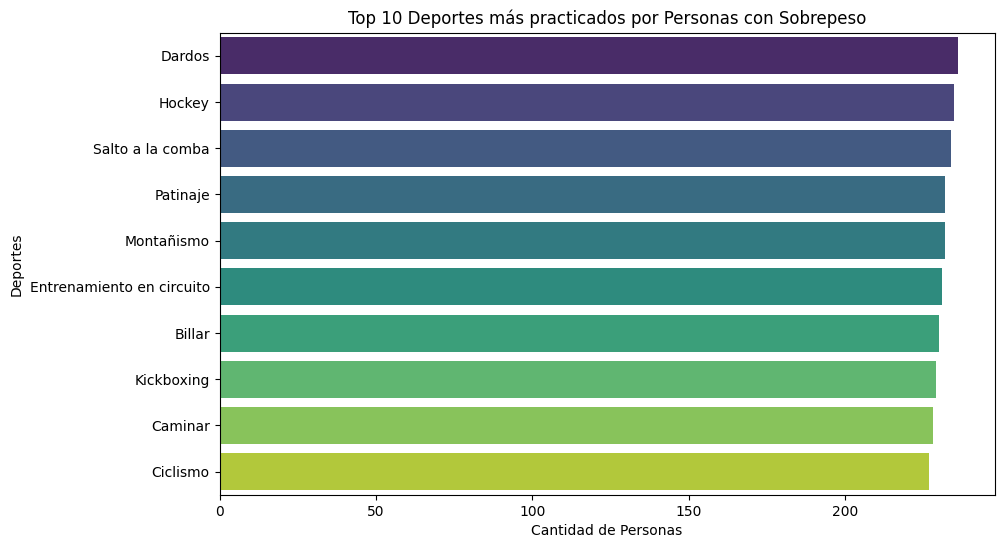

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el dataset para obtener solo las filas donde el peso es mayor a 80 Kg (gordos)
df_gordos = df_historico[df_historico['Peso (Kg)'] > 80]

# Contar la cantidad de veces que aparece cada deporte para las personas con sobrepeso
deportes_counts_gordos = df_gordos[df_historico.columns[16:]].sum()

# Ordenar los deportes de forma descendente
deportes_counts_gordos_sorted = deportes_counts_gordos.sort_values(ascending=False)

# Obtener los 10 deportes más practicados por personas con sobrepeso
deportes_top10_gordos = deportes_counts_gordos_sorted.head(10)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=deportes_top10_gordos.values, y=deportes_top10_gordos.index, palette='viridis')
plt.xlabel('Cantidad de Personas')
plt.ylabel('Deportes')
plt.title('Top 10 Deportes más practicados por Personas con Sobrepeso')
plt.show()


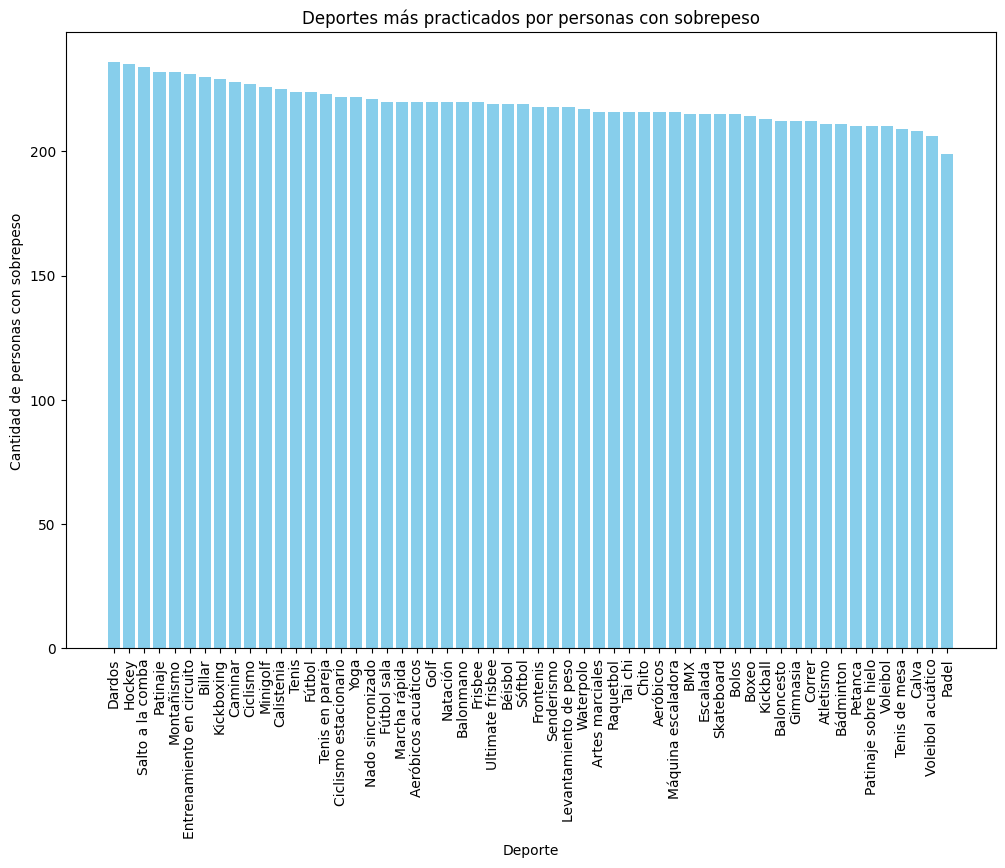

In [202]:
# Filtrar el dataset para obtener solo las filas donde el peso es mayor a 80 Kg (gordos)
df_gordos = df_historico[df_historico['Peso (Kg)'] > 80]

# Contar la cantidad de veces que aparece cada deporte para las personas con sobrepeso
deportes_counts_gordos = df_gordos[df_historico.columns[16:]].sum()

# Ordenar los deportes de forma descendente
deportes_counts_gordos_sorted = deportes_counts_gordos.sort_values(ascending=False)

# Crear el gráfico de barras para visualizar los deportes más practicados por personas con sobrepeso
plt.figure(figsize=(12, 8))
plt.bar(deportes_counts_gordos_sorted.index, deportes_counts_gordos_sorted, color='skyblue')
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Deporte')
plt.ylabel('Cantidad de personas con sobrepeso')
plt.title('Deportes más practicados por personas con sobrepeso')
plt.show()
